# Q1.a.  (10 points) create an network to approximate sin(x)

In this problem, you will try to build a three-layer fully connected network to approximate the sin function using PyTorch. There are 100 hidden units in each layer and please use ReLU activation after the first two layers and no activation after the last layer. You should implement your network model as a subclass of [torch.nn.Module](https://pytorch.org/docs/stable/generated/torch.nn.Module.html)

### <font color='red'>Define your network here</font>

In [1]:
import torch
from torch import nn
import numpy as np
import random

class Mynetwork(torch.nn.Module):
    def __init__(self):
        super(Mynetwork, self).__init__()
        #-- complete the code here
        self.fc1 = nn.Linear(1, 100)   # first layer: input -> 100 units
        self.fc2 = nn.Linear(100, 100) # second layer: 100 units -> 100 units
        self.fc3 = nn.Linear(100, 1)   # third layer: 100 units -> output
        self.relu = nn.ReLU()
        #-- end complete the code here

    def forward(self, x):
        #-- complete the code here
        x = self.fc1(x)
        x = self.relu(x)
        x = self.fc2(x)
        x = self.relu(x)
        x = self.fc3(x)
        return x
        #-- end complete the code here


### Training

In [2]:
model = Mynetwork()

loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(10000):
    x=10. * torch.rand((200,1)).type(torch.FloatTensor)
    y=torch.sin(x).view(-1)

    optimizer.zero_grad()
    yh = model(x).view(-1)
    loss = loss_fn(yh,y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 999:
        print(loss.item())

0.010445233434438705
0.0005385143449530005
0.00044061464723199606
0.0002682205231394619
0.00014259172894526273
0.0003019297728314996
0.00015361039550043643
0.00011208913929294795
7.784808985888958e-05
0.00011002282553818077


### Visualization

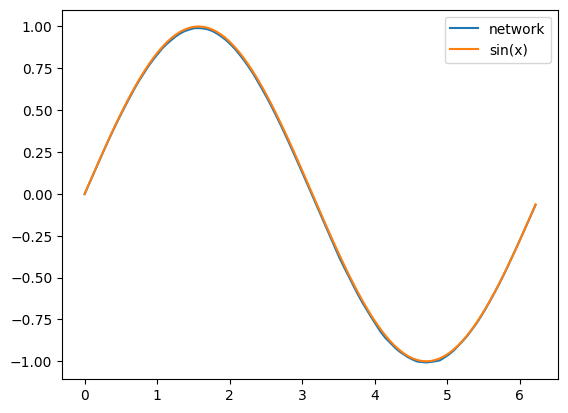

In [3]:
from matplotlib import pyplot as plt

xv=np.array(range(100))/50. *np.pi
yv=model(torch.from_numpy(xv).type(torch.FloatTensor).view((100,-1))).view(-1).detach().numpy()

plt.plot(xv,yv,label='network')
plt.plot(xv,np.sin(xv),label='sin(x)')
plt.legend()

# Q1.b. (Extra credit: 5 points) Repeat 1.a. using [torch.nn.Sequential](https://pytorch.org/docs/stable/generated/torch.nn.Sequential.html)

### <font color='red'>Redefine your model below</font>

In [ ]:
import torch
from torch import nn

class Mynetwork(nn.Module):
    def __init__(self):
        super(Mynetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 100),
            nn.ReLU(),
            nn.Linear(100, 100),
            nn.ReLU(),
            nn.Linear(100, 1)
        )

    def forward(self, x):
        return self.model(x)


### Training

In [ ]:
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters())

for epoch in range(10000):
    x=10. * torch.rand((200,1)).type(torch.FloatTensor)
    y=torch.sin(x).view(-1)

    optimizer.zero_grad()
    yh = model(x).view(-1)
    loss = loss_fn(yh,y)
    loss.backward()
    optimizer.step()

    if epoch % 1000 == 999:
        print(loss.item())

0.027381647378206253
0.0002204020565841347
0.0029236513655632734
7.226680463645607e-05
0.00018450863717589527
0.000196704117115587
0.00015346996951848269
0.0014713072450831532
4.805776916327886e-05
0.0011197581188753247


### Visualization

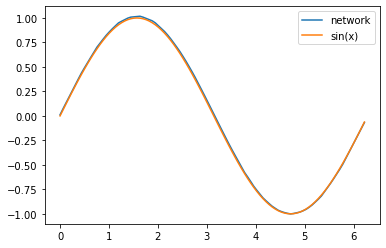

In [ ]:
from matplotlib import pyplot as plt

xv=np.array(range(100))/50. *np.pi
yv=model(torch.from_numpy(xv).type(torch.FloatTensor).view((100,-1))).view(-1).detach().numpy()

plt.plot(xv,yv,label='network')
plt.plot(xv,np.sin(xv),label='sin(x)')
plt.legend()

# Q2. Classify clothing

In this problem, you will implement a network to classify different types of clothing. We will play with the [FachionMNIST](https://github.com/zalandoresearch/fashion-mnist) dataset, which contains ten different classes.

Your network should contain three conv layers with 6, 16, and 32 filters (all 3x3 and no padding), respectively. You should use ReLU activation after each conv layer followed by 2x2 max pooling. There will be two fully connected layers after the last pooling layer. The first fully connected layer has 64 neurons.

# Q2.a. (2 points) How many outputs for the last fully connected layer (Hint: there are 10 classes)

<font color='red'>Answer: </font>

# Q2.b (6 points) How many parameters in the entire network?

<font color='red'>Answer: </font>
    
conv 1:

pooling 1:

conv2:

pooling 2:

conv3:

pooling 3:

fully-connected 1:

fully-connected 2:



# Q2.c (12 points) Complete the code below by defining the network

### Download and load the dataset

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms

use_cuda = False # set it to True if you have GPU and want to use it

transform = transforms.Compose(
    [transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))])

# Create datasets for training & validation, download if necessary
training_set = torchvision.datasets.FashionMNIST('./data', train=True, transform=transform, download=True)
validation_set = torchvision.datasets.FashionMNIST('./data', train=False, transform=transform, download=True)

# Create data loaders for our datasets; shuffle for training, not for validation
training_loader = torch.utils.data.DataLoader(training_set, batch_size=4, shuffle=True, num_workers=2)
validation_loader = torch.utils.data.DataLoader(validation_set, batch_size=4, shuffle=False, num_workers=2)

# Class labels
classes = ('T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
        'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot')

# Report split sizes
print('Training set has {} instances'.format(len(training_set)))
print('Validation set has {} instances'.format(len(validation_set)))

100%|██████████████████████████| 26421880/26421880 [00:07<00:00, 3474604.99it/s]


Extracting ./data/FashionMNIST/raw/train-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|█████████████████████████████████| 29515/29515 [00:00<00:00, 242628.50it/s]


Extracting ./data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw



100%|████████████████████████████| 4422102/4422102 [00:01<00:00, 2843096.61it/s]


Extracting ./data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./data/FashionMNIST/raw



100%|██████████████████████████████████| 5148/5148 [00:00<00:00, 3878619.90it/s]

Extracting ./data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/FashionMNIST/raw

Training set has 60000 instances
Validation set has 10000 instances


### Visualize the dataset

T-shirt/top  Shirt  Trouser  Trouser


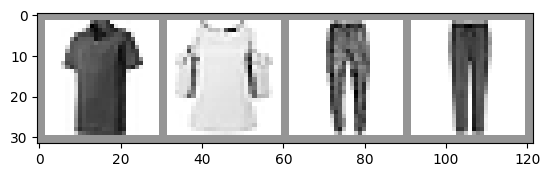

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Helper function for inline image display
def matplotlib_imshow(img, one_channel=False):
    if one_channel:
        img = img.mean(dim=0)
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    if one_channel:
        plt.imshow(npimg, cmap="Greys")
    else:
        plt.imshow(np.transpose(npimg, (1, 2, 0)))

dataiter = iter(training_loader)
images, labels = next(dataiter)

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('  '.join(classes[labels[j]] for j in range(4)))

### <font color='red'>Define your network here</font>

In [ ]:
import torch.nn as nn
import torch
import torch.nn.functional as F

class GarmentClassifier(nn.Module):
    def __init__(self):
#-- complete the code here




#-- end complete the code here

    def forward(self, x):
#-- complete the code here




#-- end complete the code here


if torch.cuda.is_available() and use_cuda:
    model = GarmentClassifier().cuda()
else:
    model = GarmentClassifier()

### Prepare "trainer"

In [ ]:
loss_fn = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

def train_one_epoch(epoch_index):
    running_loss = 0.
    last_loss = 0.

    # Here, we use enumerate(training_loader) instead of
    # iter(training_loader) so that we can track the batch
    # index and do some intra-epoch reporting
    for i, data in enumerate(training_loader):
        # Every data instance is an input + label pair
        inputs, labels = data
        if torch.cuda.is_available() and use_cuda:
            inputs=inputs.cuda()
            labels=labels.cuda()

        # Zero your gradients for every batch!
        optimizer.zero_grad()

        # Make predictions for this batch
        outputs = model(inputs)

        # Compute the loss and its gradients
        loss = loss_fn(outputs, labels)
        loss.backward()

        # Adjust learning weights
        optimizer.step()

        # Gather data and report
        running_loss += loss.item()
        if i % 1000 == 999:
            last_loss = running_loss / 1000 # loss per batch
            print('  batch {} loss: {}'.format(i + 1, last_loss))
            running_loss = 0.

    return last_loss

### Start training

In [ ]:
# Initializing in a separate cell so we can easily add more epochs to the same run
torch.multiprocessing.set_sharing_strategy('file_system')
# timestamp = datetime.now().strftime('%Y%m%d_%H%M%S')
# writer = SummaryWriter('runs/fashion_trainer_{}'.format(timestamp))
epoch_number = 0

EPOCHS = 3

best_vloss = 1_000_000.

for epoch in range(EPOCHS):
    print('EPOCH {}:'.format(epoch_number + 1))

    # Make sure gradient tracking is on, and do a pass over the data
    model.train(True)
    avg_loss = train_one_epoch(epoch_number)

    # We don't need gradients on to do reporting
    model.train(False)

    running_vloss = 0.0
    for i, vdata in enumerate(validation_loader):
        vinputs, vlabels = vdata
        if torch.cuda.is_available() and use_cuda:
            vinputs=vinputs.cuda()
            vlabels=vlabels.cuda()
        voutputs = model(vinputs)
        vloss = loss_fn(voutputs, vlabels)
        running_vloss += vloss

    avg_vloss = running_vloss / (i + 1)
    print('LOSS train {} valid {}'.format(avg_loss, avg_vloss))

    # Track best performance, and save the model's state
    if avg_vloss < best_vloss:
        best_vloss = avg_vloss

    epoch_number += 1

EPOCH 1:
  batch 1000 loss: 0.5016711144386791
  batch 2000 loss: 0.4879903859840706
  batch 3000 loss: 0.5153748965951381
  batch 4000 loss: 0.49523143982025797
  batch 5000 loss: 0.4767445433982648
  batch 6000 loss: 0.49395503593399187
  batch 7000 loss: 0.46382360034110026
  batch 8000 loss: 0.46008388720825316
  batch 9000 loss: 0.4629328250864637
  batch 10000 loss: 0.46100793036620596
  batch 11000 loss: 0.45335045937914403
  batch 12000 loss: 0.46304751582280734
  batch 13000 loss: 0.4592298640280496
  batch 14000 loss: 0.4622895815780503
  batch 15000 loss: 0.4423966025863192
LOSS train 0.4423966025863192 valid 0.46024414896965027
EPOCH 2:
  batch 1000 loss: 0.42145762145856863
  batch 2000 loss: 0.47108051656538735
  batch 3000 loss: 0.44253823141008614
  batch 4000 loss: 0.4101803269519005
  batch 5000 loss: 0.4296010117421392
  batch 6000 loss: 0.41699717939435504
  batch 7000 loss: 0.4182659008966293
  batch 8000 loss: 0.428519713369722
  batch 9000 loss: 0.414696854619440

### Verify results

Groundtruth: Ankle Boot  Pullover  Trouser  Trouser
Result:      Ankle Boot  Pullover  Trouser  Trouser


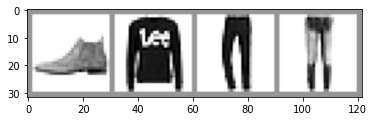

In [ ]:
dataiter = iter(validation_loader)
images, labels = dataiter.next()

# Create a grid from the images and show them
img_grid = torchvision.utils.make_grid(images)
matplotlib_imshow(img_grid, one_channel=True)
print('Groundtruth: '+'  '.join(classes[labels[j]] for j in range(4)))
if torch.cuda.is_available() and use_cuda:
    images=images.cuda()
print('Result:      '+'  '.join([classes[i] for i in torch.argmax(model(images).cpu(),1)]))

# Q2.d (Extra credit: 10 points) Try to see if you can modify the network so that the validation loss is less than 0.3 and the number of parameters are no more than 5% more than the original one


# Q3. Object detection with YOLOv5

Please follow the instructions [here](https://pytorch.org/hub/ultralytics_yolov5/) to install YOLOv5 on PyTorch.



# Q3.a (10 points) Test YOLOv5s on one of your own photos. Show your code and results.

# Q3.b (Extra credit: 5 points) Combine YOLO and OpenCV to detect object from webcam stream by completing the code below (Hint: dir(model(frame)))

### <font color='red'>Complete the code below</font>

In [ ]:
import cv2
import platform

cap=cv2.VideoCapture(0)

model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

while (True):

    ret,frame=cap.read()

    results = model(frame)

#-- complete the code here


#-- end complete the code here

    if cv2.waitKey(1) &0xFF == ord('q'): # press q or ESC to quit. You probably need to hit the screen first
        break

cap.release()
cv2.destroyAllWindows()

Using cache found in /home/phsamuel/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2022-3-24 torch 1.7.1 CUDA:0 (NVIDIA GeForce GTX 1070, 8120MiB)

Fusing layers... 
YOLOv5s_v6 summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 
